In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
pk = pd.read_csv('Pokemon.csv')

In [4]:
#Revisando los datos y sus estadísticas
print(pk.head())
print(pk.describe())

#Verificando valores nan
print(pk.isna().sum())

   Number                   Name  Type1   Type2  Total  HitPoints  Attack  \
0       1              Bulbasaur  Grass  Poison    318         45      49   
1       2                Ivysaur  Grass  Poison    405         60      62   
2       3               Venusaur  Grass  Poison    525         80      82   
3       3  VenusaurMega Venusaur  Grass  Poison    625         80     100   
4       4             Charmander   Fire     NaN    309         39      52   

   Defense  SpecialAttack  SpecialDefense  Speed  Generation  Legendary  
0       49             65              65     45           1      False  
1       63             80              80     60           1      False  
2       83            100             100     80           1      False  
3      123            122             120     80           1      False  
4       43             60              50     65           1      False  
           Number      Total   HitPoints      Attack     Defense  \
count  800.000000  800.00

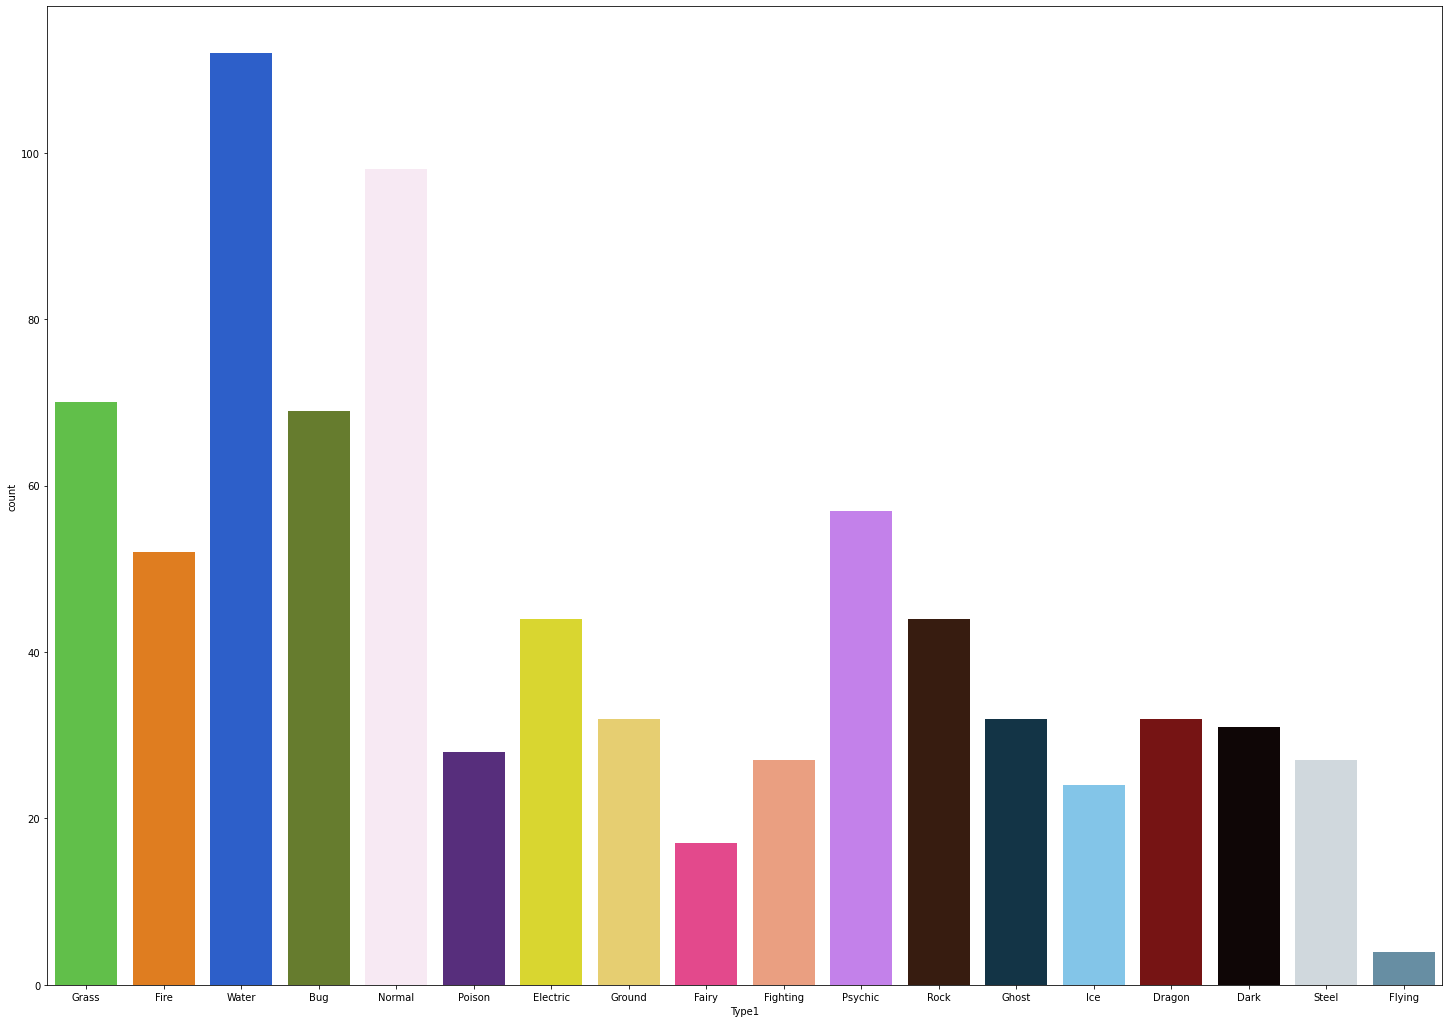

In [9]:
type_pallete = ['#55D336', '#FF7C00', '#1355E3', '#6C8921', '#F9E7F4', '#582189', '#F5F114', '#F9DA5E', '#FC3089',
                '#FC986F', '#C76FFC', '#3E1A09', '#0B374E', '#72CAF9', '#860404', '#110404', '#CED9DF', '#5D91AD']

plt.figure(figsize=(25, 18))

sns.countplot(data = pk, x = 'Type1', palette = type_pallete)

plt.show()

In [3]:
pk

,Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
X = pk[['HitPoints', 'Attack', 'Defense', 'SpecialAttack', 'SpecialDefense', 'Speed']]
y = pk['Legendary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [4]:
y_test_df = pd.DataFrame(y_test.copy())
test_df = y_test_df.join(X_test)

In [5]:
test_df[test_df.Legendary == 1]

,Legendary,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed
794,True,108,100,121,81,95,95
162,True,106,110,90,154,90,130
156,True,90,85,100,95,125,85
796,True,50,160,110,160,110,110
701,True,91,90,72,90,129,108
797,True,80,110,60,150,130,70
703,True,79,100,80,110,90,121
700,True,91,129,90,72,90,108
711,True,125,170,100,120,90,95
419,True,80,90,80,130,110,110


In [7]:
model = LogisticRegression()
model.fit(X_train.values,y_train.values)
y_pred = model.predict(X_test.values)

In [8]:
score = accuracy_score(y_test,y_pred)
print(score)

0.93


In [9]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()